### HW  

**1) Part 2의 code를 수정해서 (Strong likelihood, Weak likelihood) $\times$ (Uninformative prior, Weak prior, Strong prior)의 6가지 경우 비교해보기**  
  
  
**2) BDA 1.3 Exercise**  
Suppose that in each individual of a large population there is a pair of genes, each of which can be either x of X, that controls eye color: those with xx have blue eyes, while heterozygotes (those with Xx or xX) and those with XX have brown eyes. The proportion of blue-eyed individuals is $p^2$ and of heterozygotes is $2p(1-p)$, where $0<p<1$. Each parent transmits one of tis own genes to the child; if a parent is a heterozygote, the probability that it transmits one of its own genes to the child; if a parent is a heterozygotes, the probability that it transmits the gene of type X is $\frac{1}{2}$. Assuming random mating, show that among brown-eyed children of brown-eyed parents, the expected proportion of heterozygotes is $\frac{2p}{1+2p}$. Suppose Judy, a brown-eyed child of brown-eyed parents, marries a heterozygote, and they have n children, all brown-eyed. Find the posterior probability that Judy is a heterozygote and the probability that her first grandchild hs blue eyes. 
  
  
**3) 새로운 대학병원에서의 high risk 수술의 생존율에 관한 분석. 다른 병원에서의 경험을 통해 생존율은 $0.9$ 정도로 예상되며 $0.8$ 미만이거나 $0.97$ 초과일 것 같지는 않다고 생각한다.**   
  
3-a) Beta distribution으로 위의 belief를 survival rate에 관한 prior distribution으로 나타내라. Parameter $\alpha, \beta$는 어떻게 선정하면 좋을 것인가? 
(Hint : 여러분의 믿음의 강도 따라 $\alpha, \beta$의 답이 달라질 수 있다. 하나의 정답을 맞추는 것이 아니라 실생활의 문제를 해석하는 힘을 기르는 것이 취지라 하겠다.)
  
3-b) 이제 data gathering. 10명의 환자에 수술을 진행해 모두 생존하였다. survival rate에 관한 Posterior Distribution 구하기.  
  
3-c) 다음 환자가 생존할 확률과 다음 20명의 환자 중 2명 이상 사망할 확률을 각각 예측하시오. (Hint : Posterior Predictive) 

## Q1)

In [1]:
import numpy as np
import scipy
import scipy.stats as st
import scipy.special as sc
import matplotlib.pyplot as plt
import math

### Important Note : integrating the likelihood over theta doesn't yield 1. Thus, it makes sense to only plot the prior pdf and posterior pdf. 

### But I just calculated the likelihood value just because I need to compare if the data is "informative" ($n \uparrow$)


#### I `assume` that $\theta$ is close to 0.75 so that the rate of success = 0.75 (note, x always have to be this case).

In [2]:
class beta_binomial_model:
    
    def __init__(self, alpha, beta, theta, n, num_success):
        
        self.alpha = alpha
        self.beta = beta
        self.theta = theta
        self.n = n
        self.num_success = num_success
    
    def prior(self):
        
        return st.beta(self.alpha, self.beta)
    
    def likelihood(self):
        
        return math.comb(self.n, self.num_success) * self.theta**self.num_success * (1- self.theta) **(self.n - self.num_success)
    
    def post(self):
        
        return st.beta(self.alpha + self.n, self.beta + self.n - self.num_success)
    
    def plotting(self, plot_title):
        
        plt.figure(figsize=(8, 6))
        plt.style.use('ggplot')
        plt.plot(self.theta, self.prior().pdf(self.theta), label = 'Prior', c = 'blue')
        plt.plot(self.theta, self.likelihood(), label='Likelihood', c= 'orange')
        plt.plot(self.theta, self.post().pdf(self.theta), label = 'Posterior', c = 'red')
        plt.xlabel(r'$\theta$', fontsize=14) ; plt.ylabel('Density', fontsize=16); plt.legend()
        plt.title(plot_title)

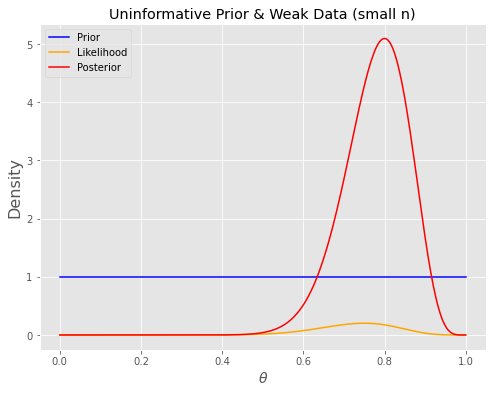

In [3]:
beta_binomial = beta_binomial_model(alpha = 1, beta = 1, theta = np.linspace(0, 1, 300), n = 20, num_success = 15)
beta_binomial.plotting('Uninformative Prior & Weak Data (small n)')

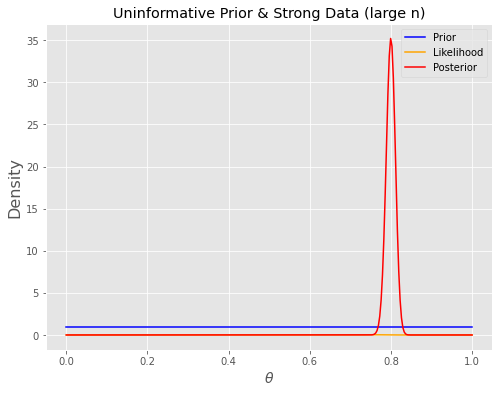

In [4]:
beta_binomial = beta_binomial_model(alpha = 1, beta = 1, theta = np.linspace(0, 1, 300), n = 1000, num_success = 750)
beta_binomial.plotting('Uninformative Prior & Strong Data (large n)')

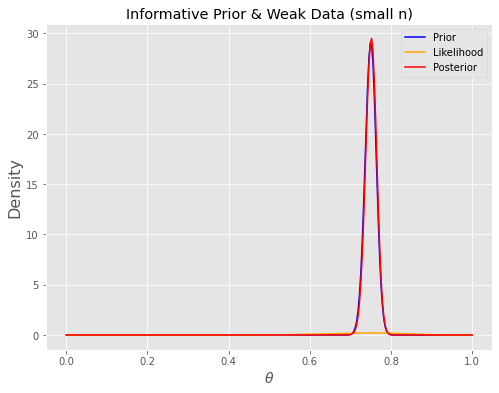

In [5]:
beta_binomial = beta_binomial_model(alpha = 750, beta = 250, theta = np.linspace(0, 1, 300), n = 20, num_success = 15)
beta_binomial.plotting('Informative Prior & Weak Data (small n)')

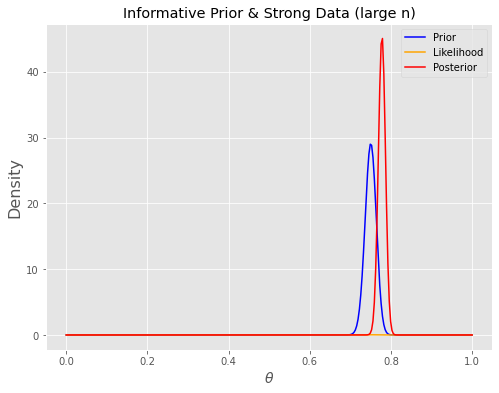

In [6]:
beta_binomial = beta_binomial_model(alpha = 750, beta = 250, theta = np.linspace(0, 1, 300), n = 1000, num_success = 750)
beta_binomial.plotting('Informative Prior & Strong Data (large n)')

### Comment : The posterior `shrinks` to the stronger side.

## Q2)

### Setting)

- xx : blue eyed

- Xx, xX : heterozygote (is brown)

- XX : brown

$P(xx) = p^2$

$p(hetereozygote) = 2p - 2p^2$

$P(XX) = (1-p)^2$

P(transmitting X to child | parent is hetereozygote) = 0.5

WTS) P(child hetereozygote | child eye brown \& parents eye brown) = $\frac{2p}{1+2p}$

### Proof : use conditional probability.

By def'n of conditional probability, the quantity to show is $\frac{P(child hetereo\& child brown eyed\& parents brown eyed)}{P(child brown eyed\& parents brown eyed)}$.

Since all hetereozygotes have brown eyes, the numerator reduces to P(child hetereo and parents brown eyed).

### 1) P(both parents XX) = $(1-p)^2 \times (1-p)^2 = (1-p)^4$

In this case, child is brown eyed with 100$\%$ of certainty and 0 probability of being heterozygote.

### 2) P(one is hetereozygote, another is heterozygote) =$(1−p)^2 \cdot 2p(1−p)+2p(1−p)\cdot(1−p)^2=4p(1−p)^3$

In this case, child is brown eyed with 100$\%$ of certainty and 0.5 probability of being heterozygote.

### 3) P(both parents hetereozygote) =$2p(1−p) \times 2p(1−p)=4p^2(1−p)^2$

In this case, child is brown eyed with 75$\%$ of certainty ($\because 1 -\frac{1}{4}$) and 0.5 probability of being heterozygote.

### Integrate all this info yields

P(child hetereo and parents brown eyed) / P(child brown eyed and parents brown eyed) = $\frac{0 \times (1-p)^4 + 0.5 \times 4p(1-p)^3 + 0.5 \times 4p^2 (1-p)^2}{1 \times (1-p)^4 + 1 \times 4p(1-p)^3 + 0.75 \times 4p^2 (1-p)^2} = \frac{2p}{1+2p}$

## Q3)

### Q3a)

Let $\Theta$ be the probability of survival. 

Since the prior distribution of $\Theta$ is $Beta(\alpha, \beta)$ that satisfies

1) Mean of the distribution = $\frac{\alpha}{\alpha + \beta} = 0.9 \rightarrow \alpha = 9k, \beta = k$

2) Most density is around $[0.8, 0.97]$. Specifically, I want $P(\theta \in [0.8, 0.97]) \geq 0.95$.

The following code is how to choose an approximate $k \in \mathbb{N}$.

In [7]:
st.beta.cdf(0.97, 9, 1)

st.beta.cdf(0.8, 9, 1)

0.13421772800000006

In [8]:
k = 1

while (st.beta.cdf(0.97, 9*k, k) - st.beta.cdf(0.8, 9*k, k) < 0.95):
    
    k = k + 1

k

5

I choose $\Theta \sim Beta(45,5)$

### Q3b)

Let $X_1$ be the $\#$ patients surviving in the first period. Assume that the survival of each patient is conditionally independent on $\Theta$. Then,

$X_1 | \Theta = \theta \sim Bin(n_1, \theta)$. 

Then, posterior : $\Theta | X_1 = x_1 \sim Beta(10 + 45, 10 - 10 + 5) = Beta(55,5)$.

Update the belief that I consider the underlying survival rate even higher than before.

Text(0.5, 1.0, 'Probability Density Functions of Prior (blue), Posterior (Red)')

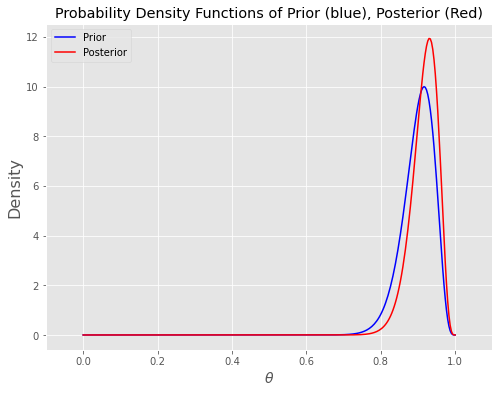

In [9]:
prior = st.beta(45,5) ; posterior = st.beta(55,5)

# plotting
thetas = np.linspace(0, 1, 300)
plt.figure(figsize=(8, 6)); plt.style.use('ggplot')
plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue') 
plt.plot(thetas, posterior.pdf(thetas), label='Posterior', c='red')
plt.xlim([-0.10, 1.10]) ; plt.xlabel(r'$\theta$', fontsize=14) ; plt.ylabel('Density', fontsize=16) ;plt.legend()

plt.title('Probability Density Functions of Prior (blue), Posterior (Red)')

### Q3c)

#### Case1)

Let $X_2$ be the $\#$ patients surviving in the second period. Assume that the survival of each patient is conditionally independent on $\Theta$.

$P(X_2 = 1 | X_1 = 10) = \int_{0}^{1} P(X_2 = 1| X_1 = 10, \Theta = \theta) f_{\Theta | X_1 = 10} (\theta) d\theta = \int_{0}^{1} P(X_2 = 1| \Theta = \theta) f_{\Theta | X_1 = 10} (\theta) d\theta$



#### Case2)


$P(X_2 \in \{0,...,18\} | X_1 = 10) = \int_{0}^{1} P(X_2  \in \{0,...,18\}| X_1 = 10, \Theta = \theta) f_{\Theta | X_1 = 10} (\theta) d\theta = \int_{0}^{1} P(X_2 \in \{0,...,18\} | \Theta = \theta) f_{\Theta | X_1 = 10} (\theta) d\theta = 1 - P(X_2 \in \{19,20\} | X_1 = 10)$

In [10]:
# Case1

print(sc.beta(56,5) / sc.beta(55,5))


# Case2

print(1- (20 * sc.beta(74,6) / sc.beta(55,5) + sc.beta(75,5)/ sc.beta(55,5)))

0.916666666666667
0.4776809916050423
